<a href="https://colab.research.google.com/github/mtello5/IS170_Machine_Learning/blob/Principal-Component-Analysis/Principle_Components_Analysis_Breast_Cancer_Data_rev3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data contains both data and labels (data is in .data and labels in .target)

In [ ]:
#breast cancer data comes with the sklearn library
from sklearn.datasets import load_breast_cancer

In [ ]:
#load_breast_cancer gives both labels and the data. Let's fetch the data.
breast=load_breast_cancer()
breast_data=breast.data

In [ ]:
#check the shape of the data
breast_data.shape

(569, 30)

In [ ]:
#rename
breast_labels=breast.target


In [ ]:
#Let's concatenate the data and labels together for a Dataframe (CSV format)
import numpy as np
labels = np.reshape(breast_labels, (569,1))
final_breast_data=np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [ ]:
#final_breast_data changes to dataframe
import pandas as pd
breast_dataset = pd.DataFrame(final_breast_data)

In [ ]:
#let's check the features
features=breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
#label is missing, so add it here
features_labels=np.append(features,'label')
#add the column names to the dataframe
breast_dataset.columns=features_labels
breast_dataset.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


### Data Normalization & Visualization

In [ ]:
#Before we do the data visualization, we'll normalize the data.
#The data normalization is a common practice 
#StandardScaler is the normalizing function.
#After the normalization, we'll do fit_transform on the data.
from sklearn.preprocessing import StandardScaler
x=breast_dataset.loc[:,features].values
x=StandardScaler().fit_transform(x) 


In [ ]:
x.shape

(569, 30)

In [ ]:
#normalized data has a mean of zero and a standard deviation of one
np.mean(x), np.std(x)

(-6.118909323768877e-16, 1.0)

In [ ]:
#converting the normalized features into a dataframe form
feat_cols=['feature'+str(i) for i in range(x.shape[1])]
normalized_breast=pd.DataFrame(x,columns=feat_cols)
normalized_breast.head()

In [ ]:
#For the PCA, we'll try components 2
from sklearn.decomposition import PCA
pca_breast=PCA(n_components=2)
principalComponents_breast=pca_breast.fit_transform(x)


In [ ]:
principal_breast_DF=pd.DataFrame(data=principalComponents_breast, columns=['principal component1', 'principal component2'])

In [ ]:
principal_breast_DF.head()

,principal component1,principal component2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


Once you have the principal components, you can find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [ ]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


The results above tells us that the principal component 1 holds 44.2% of the information and the principal component 2 holds 19%. 

<Figure size 432x288 with 0 Axes>

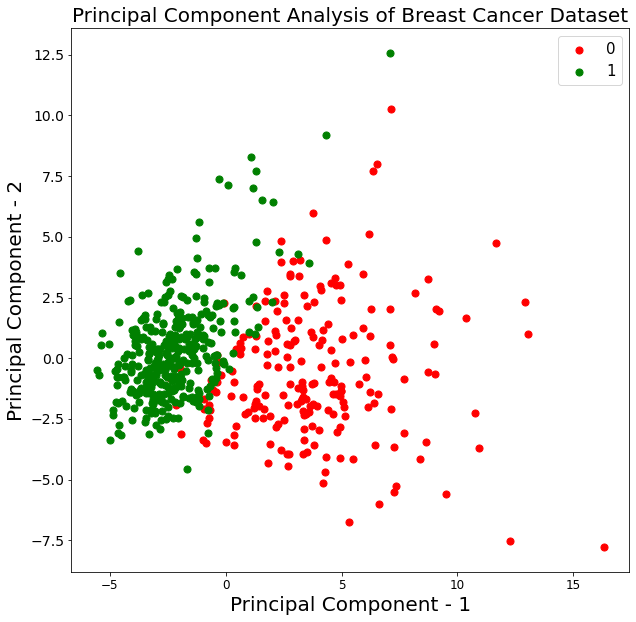

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_DF.loc[indicesToKeep, 'principal component1']
               , principal_breast_DF.loc[indicesToKeep, 'principal component2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

Note about the component number: the question of what determines the component numnber is bit unclear as this is a unsupervised algorithm (data mining). (This breast cancer data is clearly labeled with benigh and malignant). There are several approaches to in acquiring the number - the scree test, eigenvalues over 1, the skew test, etc.... The "trial and error" will be your best bet in determining what works best. 

Note: 0 is benigh and 1 is malignant.